# TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

   Term Frequency(TF) = [number of times word appeared / total no of words in a document]

Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

   Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]

In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

Finally:

   TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)
  



In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Togg is announcing new model tomorrow",
    "Google is announcing new pixel-6 phone tomorrow",
    "Microsoft is announcing linkedin tomorrow",
    "Amazon is announcing new eco-dot service tomorrow",
    "I am eating kebab and you are eating hamburger"
]

In [2]:
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [3]:
#let's print the vocabulary

print(v.vocabulary_)

{'thor': 26, 'eating': 9, 'pizza': 24, 'loki': 18, 'is': 15, 'ironman': 14, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 21, 'iphone': 13, 'tomorrow': 28, 'togg': 27, 'model': 20, 'google': 11, 'pixel': 23, 'phone': 22, 'microsoft': 19, 'linkedin': 17, 'amazon': 2, 'eco': 10, 'dot': 8, 'service': 25, 'am': 1, 'kebab': 16, 'and': 3, 'you': 29, 'are': 6, 'hamburger': 12}


In [4]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
hamburger : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
kebab : 2.386294361119891
linkedin : 2.386294361119891
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.4700036292457357
phone : 2.386294361119891
pixel : 2.386294361119891
pizza : 2.386294361119891
service : 2.386294361119891
thor : 2.386294361119891
togg : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


AS you can see above;

is , tomorrow etc. are less important (less weight) while other rare/uniqe words are more important

In [5]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.40286636 0.         0.
  0.         0.         0.24266547 0.11527033 0.         0.
  0.24266547 0.         0.         0.         0.         0.
  0.72799642 0.         0.24266547 0.         0.         0.        ]
 [0.         0.         0.         0.         0.30224568 0.56011275
  0.         0.         0.         0.         0.         0.
  0.         0.56011275 0.         0.26606332 0.         0.
  0.         0.         0.         0.34504032 0.         0.
  0.         0.         0.         0.         0.30224568 0.        ]
 [0.         0.         0.         0.         0.30224568 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.26606332 0.         0.
  0.         0.         0.56011275 0.34504032 0.         0.
  0.         0.         0.         0.56011275 0.30224568 0.        ]
 [0.         0.         0.         0.         0.26369849 0.
  0. 

In [7]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_excel("/content/drive/MyDrive/NLPraw.xlsx")
print(df.shape)
df.head(5)

(26455, 2)


,Unnamed: 0,Unnamed: 1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,Indianara Motivational Square Synthetic Wood A...
2,Household,"SAF 'Buddha Religious' Painting (Synthetic, 13..."
3,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."
4,Household,"SAF 'Flower Floral' Painting (Synthetic, 13.5 ..."


In [8]:
#Lets change column's names.
df =df.rename(columns={'Unnamed: 0':'label', 'Unnamed: 1':'Text'})

In [10]:
#Dataframe is unbalance while household about 25k, books got 6k row.
min_samples = 4918

df_household = df[df.label=="Household"].sample(min_samples, random_state=2022)
df_cloth = df[df.label=="Clothing & Accessories"].sample(min_samples, random_state=2022)
df_electronics = df[df.label=="Electronics"].sample(min_samples, random_state=2022)
df_books = df[df.label=="Books"].sample(min_samples, random_state=2022)

In [11]:
#After get minimum number of samples, we concat dataframe again. 
df = pd.concat([df_household,df_cloth,df_electronics,df_books],axis=0)

In [12]:
#check the distribution of labels 
df['label'].value_counts()

Household                 4918
Clothing & Accessories    4918
Electronics               4918
Books                     4918
Name: label, dtype: int64

In [13]:
#Add the new column which gives a unique number to each of these labels, labelling..

df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)

,label,Text,label_num
11114,Household,Jaquar Health Faucet With Long Easy Flex Tube-...,0
8769,Household,"Tosaa Mix Fruit Plastic Tray, 34cm, White",0
7901,Household,Generic Innovative Rinse Bowl And Strainer In ...,0
8860,Household,PACKNBUY Wine Bottle Aerator Decanter Pourer a...,0
4032,Household,MMF Industries Steelmaster Security Key Cabine...,0


In [15]:
# To check any null values we used isna method, i encountered error while fitting with pipeline and fixed like this.
df.isna().sum()


label        0
Text         0
label_num    0
dtype: int64

In [16]:
#dropped 1 null value.
df=df.dropna()

In [17]:
#lets check shape of dataframe.
df.shape

(19671, 3)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [19]:
#Lets check shape of train and test groups.
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (15736,)
Shape of X_test:  (3935,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. we created pipeline here, TFid vectorizer and KNN classifer. Lets check result, i'll keep try different methods manually instead of creating iteration method.
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       984
           1       0.96      0.94      0.95       983
           2       0.93      0.92      0.92       984
           3       0.95      0.97      0.96       984

    accuracy                           0.94      3935
   macro avg       0.94      0.94      0.94      3935
weighted avg       0.94      0.94      0.94      3935



In [24]:
X_test[:10]

94       Nilkamal Apple Junior's Study Table Set - Red ...
5694     Story@Home Door Mat Combo Set of 2 for Home, B...
12427    The Genius of Birds About the Author Jennifer ...
21981    TIZUM External Hard Drive Case for 2.5-Inch Ha...
5462     Sleep Matic Waterproof 78"X 72"X10" Cotton Fit...
4961     Neelam Ratna Lakshmi Peeli/Yellow Kawri Kodi P...
4024     Puffin™ Multipurpose 3 Xtra Plastic Modular Dr...
9098     Wantrn Insect Killer Device 20W ( Fly Killer M...
11382    Bulfyss Arashi Plastic Portable Mini USB and B...
9958     LG 260 L 3 Star Frost Free Double Door Refrige...
Name: Text, dtype: object

In [25]:
y_test[:10]

94       0
5694     0
12427    1
21981    2
5462     0
4961     0
4024     0
9098     0
11382    0
9958     0
Name: label_num, dtype: int64

In [27]:
#Look like amazing. To be honest i also confused about no:9098 article lets check what is it
y_pred[:10]

array([0, 0, 1, 2, 0, 0, 0, 3, 0, 0])

In [30]:
#Looks like electronic to me but anyway.Lets continue
X_test[:10][9098]

'Wantrn Insect Killer Device 20W ( Fly Killer Machine & Bug Killer ) Branded fly catcher machine one year warranty off side'

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data. Note:

use TF-IDF for pre-processing the text.

use MultinomialNB as the classifier.

print the classification report.

In [31]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       984
           1       0.98      0.92      0.95       983
           2       0.93      0.94      0.93       984
           3       0.96      0.97      0.96       984

    accuracy                           0.94      3935
   macro avg       0.94      0.94      0.94      3935
weighted avg       0.94      0.94      0.94      3935



using sklearn pipeline module create a classification pipeline to classify the 

use TF-IDF for pre-processing the text.

use Random Forest as the classifier.

print the classification report.

In [32]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object /same steps with different ML methods.
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       984
           1       0.93      0.93      0.93       983
           2       0.92      0.90      0.91       984
           3       0.95      0.97      0.96       984

    accuracy                           0.92      3935
   macro avg       0.92      0.92      0.92      3935
weighted avg       0.92      0.92      0.92      3935



In [33]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # For remove stop words and lemmatize based on spacy's english library  we created loop and cleaned them.
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [34]:
#Using this function we just created.
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [35]:
#lets check what happened.
df.head()

,label,Text,label_num,preprocessed_txt
11114,Household,Jaquar Health Faucet With Long Easy Flex Tube-...,0,Jaquar Health Faucet Long Easy Flex Tube Ald 5...
8769,Household,"Tosaa Mix Fruit Plastic Tray, 34cm, White",0,Tosaa Mix Fruit Plastic Tray 34 cm White
7901,Household,Generic Innovative Rinse Bowl And Strainer In ...,0,Generic Innovative Rinse Bowl Strainer Multico...
8860,Household,PACKNBUY Wine Bottle Aerator Decanter Pourer a...,0,PACKNBUY Wine Bottle Aerator Decanter Pourer O...
4032,Household,MMF Industries Steelmaster Security Key Cabine...,0,MMF Industries Steelmaster Security Key Cabine...


In [36]:
#We will split dataframe again , because of we trimmed stop words and we must create train and test again with them again.
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [37]:
#1. again same types with most succesful results, maybe we could reach better f1score.
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       984
           1       0.94      0.93      0.93       983
           2       0.93      0.92      0.93       984
           3       0.94      0.97      0.95       984

    accuracy                           0.93      3935
   macro avg       0.93      0.93      0.93      3935
weighted avg       0.93      0.93      0.93      3935



In [38]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       984
           1       0.98      0.92      0.95       983
           2       0.92      0.94      0.93       984
           3       0.95      0.97      0.96       984

    accuracy                           0.94      3935
   macro avg       0.94      0.94      0.94      3935
weighted avg       0.94      0.94      0.94      3935



If you compare above classification report with respect to RandomForest Model with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

Plot confusion matrix

In [39]:
#lets check confusion matrix to see how its work
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[912,   9,  43,  20],
       [ 33, 904,  24,  22],
       [ 46,  11, 922,   5],
       [ 18,   1,  12, 953]])

Text(69.0, 0.5, 'Truth')

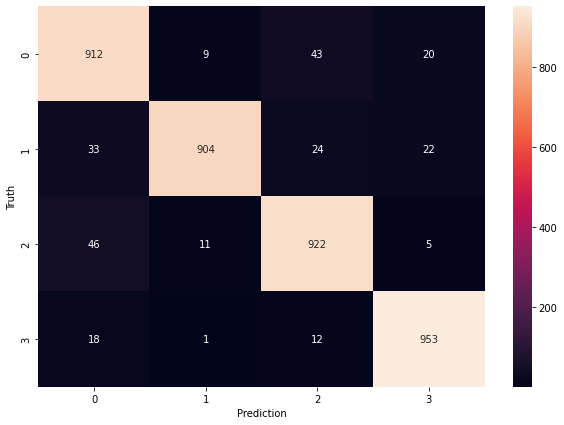

In [40]:
#Lets visualize it, who dont like numbers :)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Its performing well, As you can see False predicts are dark as night and True numbers represent light as possible. Thank you for your time and consider my work :)